In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
%matplotlib inline

In [9]:
### sensor_data_increased load
root_path = './data/'

dataset = pd.read_excel(''.join([root_path,'haitian-kashui.xlsx']), encoding = 'CP94')
dataset = dataset[['CurrentTemp1','CurrentTemp2','CurrentTemp3', 'CurrentTemp4','CurrentTemp5','InjEndPosi','ClpOpnTime','ClpClsTime','ChargeTime','CycleTime','TurnPosi',
                    'TurnPress','label']]

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

###  scaling
scaled_X = preprocessing.RobustScaler().fit_transform(X)

In [13]:
### 랜덤 pca 학습
rnd_pca = PCA(n_components=3, svd_solver="randomized")
X_rnd_reduced = rnd_pca.fit_transform(scaled_X)

In [14]:
# 설명력 합
sum(rnd_pca.explained_variance_ratio_)

0.9999583276429487

In [20]:
X_rnd_df = pd.DataFrame(X_rnd_reduced)

In [29]:
X_rnd_df = pd.concat([X_rnd_df,y], axis=1)

In [87]:
# x,y,z 축을 바꿔 3차원 plot
def make_3D(df):
    # x,y,z축을 바꿔 다각도로 시각화
    zdir = [(0,1,2),(0,2,1),(1,0,2),(1,2,0),(2,0,1),(2,1,0)]
    for i,j,k in zdir:
        fig = plt.figure()

        ax=fig.gca(projection='3d')
        data = X_rnd_df[X_rnd_df.label == 1]
        ax.scatter(data[i],data[j],data[k], c='y', label='X_rnd_reduced')
        ax.legend()

        ax=fig.gca(projection='3d')
        data = X_rnd_df[X_rnd_df.label == 2]
        ax.scatter(data[i],data[j],data[k], c='g')

        ax=fig.gca(projection='3d')
        data = X_rnd_df[X_rnd_df.label == 3]
        ax.scatter(data[i],data[j],data[k], c='r')

        plt.show()

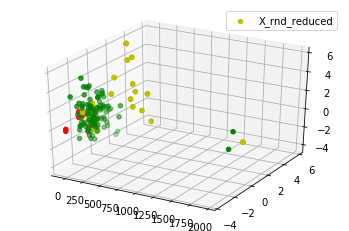

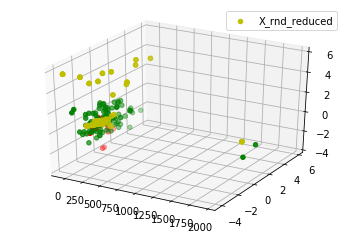

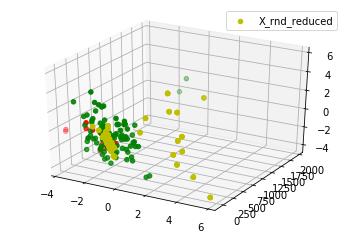

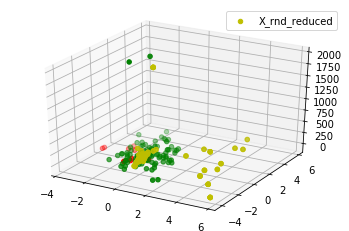

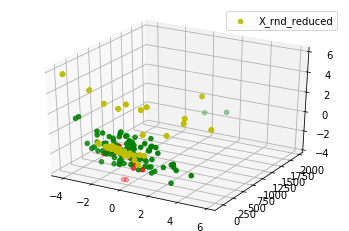

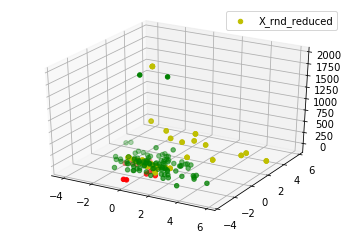

In [88]:
make_3D(X_rnd_df)

In [91]:
# 앞, 옆, 위 그려주는 2차원 plot
def make_3D_to_2D(df):
    # df안의 {1,2,3} 3개의 'label'로 plot
    zdir=[(0,1),(1,2),(0,2)]
    for i,j in zdir:
        fig=plt.figure()

        b1 = plt.scatter(df[i][df.label == 1], df[j][df.label == 1], c='yellow',s=20)
        b1 = plt.scatter(df[i][df.label == 2], df[j][df.label == 2], c='green',s=20)
        b1 = plt.scatter(df[i][df.label == 3], df[j][df.label == 3], c='red',s=20)

        plt.show()

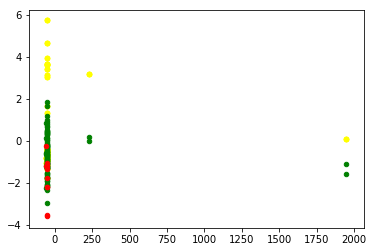

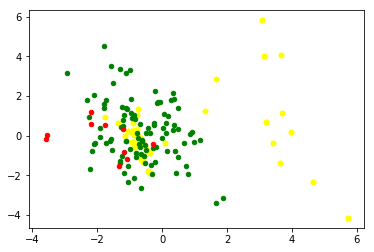

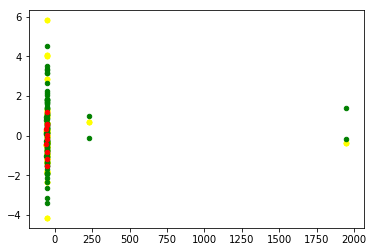

In [92]:
make_3D_to_2D(X_rnd_df)